In [1]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

import numpy as np
import pandas as pd
from datetime import datetime

#from sklearn.metrics import r2_score

'''
Author: Enrico Ceccolini
    TODO write the description
'''

#datadir = "/datasets/eurora_data/db/"
datadir = "/datasets/eurora_data/db1/"
infile_jobs = datadir + "jobs_cleaned.csv"

# settings
#interval_comment = "WholeData"
#suffix = "_1min_"

jobs_data = pd.read_csv(infile_jobs, index_col=0)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#jobs_data = pd.read_csv(infile_jobs)
print("jobs_whole_data contains {} records".format(jobs_data.shape[0]))

jobs_whole_data contains 404792 records


In [3]:
jobs_data.head(1)

,job_id_string,job_name,queue,start_time,run_start_time,end_time,user,node_req,cpu_req,mem_req,time_req,deleted,dependency,exit_status,pbs_exit_code,gpu_req,mic_req
job_id,,,,,,,,,,,,,,,,,
205722,1006691.node129,sub_Tio2_2x2x1_,parallel,2014-08-13 00:01:21,2014-08-13 00:03:14,2014-08-13 03:03:48,mpalummo@node129.eurora.cineca.it,1,16,0,NaN,NaN,NaN,COMPLETED,NaN,NaN,NaN


In [4]:
jobs_data['duration'] = pd.to_datetime(jobs_data['end_time']) - pd.to_datetime(jobs_data['run_start_time'])

In [5]:
jobs_data['duration'].astype('timedelta64[s]').head()

job_id
205722    10834.0
205723     1822.0
205724     5125.0
205725     1210.0
205726    28816.0
Name: duration, dtype: float64

In [6]:
print("{}: somma totale della durata dei job".format(jobs_data['duration'].sum()))

5073 days 06:12:37: somma totale della durata dei job


In [7]:
print("{}: somma della durata dei job sotto al minuto".format(jobs_data[jobs_data['duration'] < np.timedelta64(1, 'm')]['duration'].sum()))

20 days 00:45:48: somma della durata dei job sotto al minuto


In [8]:
print("{}: somma della durata dei job sotto 5 minuti".format(jobs_data[jobs_data['duration'] < np.timedelta64(5, 'm')]['duration'].sum()))

45 days 08:51:24: somma della durata dei job sotto 5 minuti


In [9]:
jobs_data[jobs_data['duration'] < np.timedelta64(30, 'm')]['duration'].sum()

Timedelta('255 days 03:12:11')

In [10]:
20*100/5073

0.39424403705893946

In [11]:
jobs_duration = {'5s': 0, '10s': 0, '30s': 0, '1m': 0, '5m': 0, '30m':0, '1h': 0, '5h': 0, '1d': 0, 'more': 0}

In [12]:
jobs_duration['2s'] = jobs_data[jobs_data['duration'] < np.timedelta64(2, 's')].shape[0]
jobs_duration['5s'] = jobs_data[jobs_data['duration'] < np.timedelta64(5, 's')].shape[0]
jobs_duration['10s'] = jobs_data[jobs_data['duration'] < np.timedelta64(10, 's')].shape[0]
jobs_duration['30s'] = jobs_data[jobs_data['duration'] < np.timedelta64(30, 's')].shape[0]
jobs_duration['1m'] = jobs_data[jobs_data['duration'] < np.timedelta64(1, 'm')].shape[0]
jobs_duration['5m'] = jobs_data[jobs_data['duration'] < np.timedelta64(5, 'm')].shape[0]
jobs_duration['30m'] = jobs_data[jobs_data['duration'] < np.timedelta64(30, 'm')].shape[0]
jobs_duration['1h'] = jobs_data[jobs_data['duration'] < np.timedelta64(1, 'h')].shape[0]
jobs_duration['5h'] = jobs_data[jobs_data['duration'] < np.timedelta64(5, 'h')].shape[0]
jobs_duration['1d'] = jobs_data[jobs_data['duration'] < np.timedelta64(24, 'h')].shape[0]
jobs_duration['more'] = jobs_data[jobs_data['duration'] >= np.timedelta64(24, 'h')].shape[0]
jobs_duration['1d'] -= jobs_duration['5h']
jobs_duration['5h'] -= jobs_duration['1h']
jobs_duration['1h'] -= jobs_duration['30m']
jobs_duration['30m'] -= jobs_duration['5m']
jobs_duration['5m'] -= jobs_duration['1m']
jobs_duration['1m'] -= jobs_duration['30s']
jobs_duration['30s'] -= jobs_duration['10s']
jobs_duration['10s'] -= jobs_duration['5s']
jobs_duration['5s'] -= jobs_duration['2s']

print("{}".format(jobs_duration['2s']))
print("{}".format(jobs_duration['5s']))
print("{}".format(jobs_duration['10s']))
print("{}".format(jobs_duration['30s']))
print("{}".format(jobs_duration['1m']))
print("{}".format(jobs_duration['5m']))
print("{}".format(jobs_duration['30m']))
print("{}".format(jobs_duration['1h']))
print("{}".format(jobs_duration['5h']))
print("{}".format(jobs_duration['1d']))
print("{}".format(jobs_duration['more']))

23684
151796
135421
18183
4188
13819
18551
7377
28624
3139
10


In [13]:
labels = list(jobs_duration.keys())
values = list(jobs_duration.values())
print(labels)
print(values)

['5s', '30m', '30s', '1h', '5m', '5h', '10s', '2s', 'more', '1d', '1m']
[151796, 18551, 18183, 7377, 13819, 28624, 135421, 23684, 10, 3139, 4188]


In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = ['0-5sec', '5-10sec', '10-30sec', '30-60s', '60sec-more']
labels = ['0-5sec', '5-10sec', '10-60sec']
more = jobs_duration['more'] + jobs_duration['1d'] + jobs_duration['5h'] + jobs_duration['1h'] + jobs_duration['30m'] + jobs_duration['5m']
#sizes = [jobs_duration['2s']+jobs_duration['5s'], jobs_duration['10s'], jobs_duration['30s'], jobs_duration['1m'], more]
sizes = [jobs_duration['2s']+jobs_duration['5s'], jobs_duration['10s'], jobs_duration['30s'] +jobs_duration['1m']]
#explode = (0.01, 0.01, 0.01, 0.01, 0.01) 
explode = (0.01, 0.01, 0.01) 
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=45)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
 
#plt.title('Average Monthly Consumption'
 
plt.show()

<Figure size 600x600 with 1 Axes>

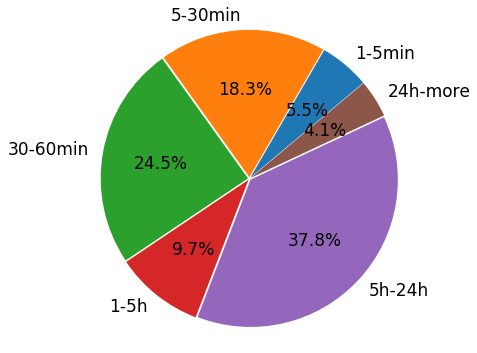

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['1-5min', '5-30min', '30-60min', '1-5h', '5h-24h', '24h-more']
sizes = [jobs_duration['1m'], jobs_duration['5m'], jobs_duration['30m'], jobs_duration['1h'], jobs_duration['5h'], jobs_duration['1d']]
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01) 
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=40)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
 
#plt.title('Average Monthly Consumption')
 
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,5)

In [17]:
jobs_short = jobs_data[jobs_data['duration'] < np.timedelta64(1, 'm')]

In [18]:
jobs_short_1403 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-04')].shape[0]
jobs_short_1404 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-05')].shape[0]
jobs_short_1405 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-06')].shape[0]
jobs_short_1406 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-07')].shape[0]
jobs_short_1407 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-08')].shape[0]
jobs_short_1408 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-09')].shape[0]
jobs_short_1409 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-10')].shape[0]
jobs_short_1410 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-11')].shape[0]
jobs_short_1411 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2014-12')].shape[0]

jobs_short_1412 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-01')].shape[0]
jobs_short_1501 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-02')].shape[0]
jobs_short_1502 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-03')].shape[0]
jobs_short_1503 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-04')].shape[0]
jobs_short_1504 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-05')].shape[0]
jobs_short_1505 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-06')].shape[0]
jobs_short_1506 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-07')].shape[0]
jobs_short_1507 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-08')].shape[0]
jobs_short_1508 = jobs_short[pd.to_datetime(jobs_short['run_start_time']) <= pd.to_datetime('2015-09')].shape[0]

jobs_short_1508 -= jobs_short_1507
jobs_short_1507 -= jobs_short_1506
jobs_short_1506 -= jobs_short_1505
jobs_short_1505 -= jobs_short_1504
jobs_short_1504 -= jobs_short_1503
jobs_short_1503 -= jobs_short_1502
jobs_short_1502 -= jobs_short_1501
jobs_short_1501 -= jobs_short_1412
jobs_short_1412 -= jobs_short_1411
jobs_short_1411 -= jobs_short_1410
jobs_short_1410 -= jobs_short_1409
jobs_short_1409 -= jobs_short_1408
jobs_short_1408 -= jobs_short_1407
jobs_short_1407 -= jobs_short_1406
jobs_short_1406 -= jobs_short_1405
jobs_short_1405 -= jobs_short_1404
jobs_short_1404 -= jobs_short_1403

print("{}".format(jobs_short_1403))
print("{}".format(jobs_short_1404))
print("{}".format(jobs_short_1405))
print("{}".format(jobs_short_1406))
print("{}".format(jobs_short_1407))
print("{}".format(jobs_short_1408))
print("{}".format(jobs_short_1409))
print("{}".format(jobs_short_1410))
print("{}".format(jobs_short_1411))
print("{}".format(jobs_short_1412))
print("{}".format(jobs_short_1501))
print("{}".format(jobs_short_1502))
print("{}".format(jobs_short_1503))
print("{}".format(jobs_short_1504))
print("{}".format(jobs_short_1505))
print("{}".format(jobs_short_1506))
print("{}".format(jobs_short_1507))
print("{}".format(jobs_short_1508))


330
65811
2878
5496
62182
52239
69211
22870
0
903
43219
0
36
960
1246
4691
1184
16


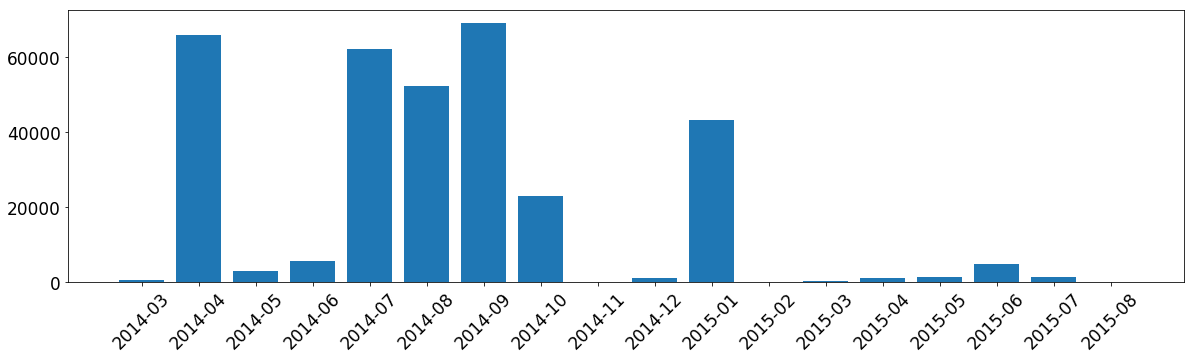

In [19]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0

dates = ['2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08']
instances = [330, 65811, 2878, 5496, 62182, 52239, 69211, 22870, 0, 903, 43219, 0, 36, 960, 1246, 4691, 1184,16]
plt.rcParams['figure.figsize'] = (20,5)

fig, axs = plt.subplots()
plt.setp(axs.xaxis.get_majorticklabels(), rotation=45)

axs.bar(dates, instances)

# fig.suptitle('Categorical Plotting')
plt.show()

In [26]:
jobs_short.shape[0]

333272

In [21]:
jobs_short.head()

,job_id_string,job_name,queue,start_time,run_start_time,end_time,user,node_req,cpu_req,mem_req,time_req,deleted,dependency,exit_status,pbs_exit_code,gpu_req,mic_req,duration
job_id,,,,,,,,,,,,,,,,,,
205753,1006722.node129,rLdir0,parallel,2014-08-13 04:30:15,2014-08-13 04:30:17,2014-08-13 04:30:29,mdotti00@node129.eurora.cineca.it,1,16,14680064,NaN,NaN,NaN,COMPLETED,NaN,0.0,0.0,00:00:12
205757,1006726.node129,rLdir0,parallel,2014-08-13 05:00:15,2014-08-13 05:00:17,2014-08-13 05:00:28,mdotti00@node129.eurora.cineca.it,1,16,14680064,NaN,NaN,NaN,COMPLETED,NaN,0.0,0.0,00:00:11
205763,1006732.node129,rLdir0,parallel,2014-08-13 05:30:18,2014-08-13 05:30:20,2014-08-13 05:30:30,mdotti00@node129.eurora.cineca.it,1,16,14680064,NaN,NaN,NaN,COMPLETED,NaN,0.0,0.0,00:00:10
205767,1006736.node129,rLdir0,parallel,2014-08-13 06:00:14,2014-08-13 06:00:15,2014-08-13 06:00:30,mdotti00@node129.eurora.cineca.it,1,16,14680064,NaN,NaN,NaN,COMPLETED,NaN,0.0,0.0,00:00:15
205772,1006741.node129,rLdir0,parallel,2014-08-13 06:30:18,2014-08-13 06:30:19,2014-08-13 06:30:31,mdotti00@node129.eurora.cineca.it,1,16,14680064,NaN,NaN,NaN,COMPLETED,NaN,0.0,0.0,00:00:12


In [27]:
jobs_short.groupby('user')['job_id_string'].nunique().reset_index(name='counts').sort_values('counts', ascending=False)

,user,counts
173,asaetti0@node129.eurora.cineca.it,28739
141,alorenzo@node045.eurora.cineca.it,23143
466,szia0000@node045.eurora.cineca.it,23073
465,szia0000@node044.eurora.cineca.it,18092
479,szia0000@node059.eurora.cineca.it,16330
427,sdecherc@node045.eurora.cineca.it,13789
475,szia0000@node055.eurora.cineca.it,12639
429,sdecherc@node047.eurora.cineca.it,11360
470,szia0000@node049.eurora.cineca.it,9754
432,sdecherc@node055.eurora.cineca.it,9570


In [22]:
jobs_short.groupby('job_name')['job_id_string'].nunique().reset_index(name='counts').sort_values('counts', ascending=False)

,job_name,counts
9530,run_SMD,31071
1840,hpgp_MD1,30667
1395,acyclovir5,21311
9783,therm2.job,19034
1951,job_DH4T_2,16190
1154,SMD_4h_1,15902
1158,SMD_4h_4,13980
1383,a7_aop_MD,9830
1397,acyclovir7,9199
1156,SMD_4h_2,8801


In [23]:
jobs_short.groupby(['node_req', 'cpu_req', 'gpu_req'])['job_id_string'].nunique().reset_index(name='counts').sort_values('counts', ascending=False)

,node_req,cpu_req,gpu_req,counts
5,1,2,2.0,137841
25,1,16,2.0,66769
16,1,8,2.0,35280
0,1,1,0.0,29796
7,1,4,0.0,2883
23,1,16,0.0,1896
14,1,8,0.0,797
40,2,32,0.0,681
1,1,1,1.0,484
2,1,1,2.0,432


In [25]:
# job that ran in more than 1 nodes
jobs_short[jobs_short['node_req'] > 1].shape[0]

5115

In [29]:
jobs_short_copy = jobs_short

In [36]:
jobs_short_copy['user'] =jobs_short_copy.apply(lambda row: row['user'].split('@')[0], axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
jobs_short_copy.groupby('user')['job_id_string'].nunique().reset_index(name='counts').sort_values('counts', ascending=False)

,user,counts
331,szia0000,137829
314,sdecherc,59784
202,ggrazios,42769
105,alorenzo,35477
121,asaetti0,28739
124,aspitale,5681
249,mdistefa,2968
150,dmeggiol,822
250,mdotti00,683
268,msaba000,645
